In [1]:
!nvidia-smi

Mon Apr 19 16:48:04 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 461.40       Driver Version: 461.40       CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce GTX 105... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   52C    P8    N/A /  N/A |     78MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Libraries

In [1]:
import requests,zipfile,tarfile,math,librosa,os,random,shutil
import soundfile as sf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
from shutil import copy
from os import path
from sklearn.preprocessing import StandardScaler
from pydub import AudioSegment
from pydub.playback import play
from scipy.io.wavfile import write 
import librosa.display
import IPython.display as ipd
import librosa
import scipy


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from tensorflow.keras.layers import Conv2D, Input, LeakyReLU, Flatten, Dense, Reshape, Conv2DTranspose, BatchNormalization, Activation
from tensorflow.keras import Model, Sequential
import tensorflow as tf

In [4]:
tf.compat.v1.enable_eager_execution()
print(tf.__version__)
print(tf.executing_eagerly())

1.14.0
True


In [5]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7857170891284234858
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3146173644
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7847613045528826148
physical_device_desc: "device: 0, name: GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [6]:
import tensorflow as tf
from tensorflow.python.keras import backend as K

# adjust values to your needs
config = tf.compat.v1.ConfigProto( device_count = {'GPU': 1 , 'CPU': 8} )
sess = tf.compat.v1.Session(config=config) 
K.set_session(sess)

In [8]:
#tf.debugging.set_log_device_placement(True)

# Create some tensors
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)

print(c)


tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [ ]:
from tqdm import tqdm
from time import sleep
import os
directory = "F:\\ahmed\\Desktop\\noise reduction\\Noise Reduction dataset\\Mozilla\\cv-corpus-6.1-2020-12-11\\en\\clips"
for file in tqdm(os.listdir(directory)):
    if not os.path.exists("E:\\Mozilla\\cv-corpus-6.1-2020-12-11\\en\\clips\\"+file):
         copy("F:\\ahmed\\Desktop\\noise reduction\\Noise Reduction dataset\\Mozilla\\cv-corpus-6.1-2020-12-11\\en\\clips"+file,"E:\\Mozilla\\cv-corpus-6.1-2020-12-11\\en\\clips\\"+file)
    


  0%|▏                                                                        | 3412/1584321 [00:19<5:52:36, 74.72it/s]


  0%|▏                                                                        | 4814/1584321 [00:36<6:48:43, 64.41it/s]


  0%|▎                                                                        | 6169/1584321 [00:55<8:52:06, 49.43it/s]


  0%|▎                                                                       | 7234/1584321 [01:13<10:24:37, 42.08it/s]


  1%|▎                                                                       | 8100/1584321 [01:31<10:16:08, 42.64it/s]


  1%|▍                                                                        | 8939/1584321 [01:48<9:18:05, 47.05it/s]


  1%|▍                                                                        | 9745/1584321 [02:06<7:53:58, 55.37it/s]


  1%|▍                                                                       | 10551/1584321 [02:24<8:51:08, 49.38it/s]


  1%|▌                                                                       | 11198/1584321 [02:40<9:34:08, 45.67it/s]


  1%|▌                                                                       | 11940/1584321 [02:58<9:45:55, 44.73it/s]


  1%|▌                                                                      | 12583/1584321 [03:16<15:34:03, 28.05it/s]


  1%|▌                                                                      | 13187/1584321 [03:35<18:43:59, 23.30it/s]


  1%|▌                                                                      | 13763/1584321 [03:54<18:27:50, 23.63it/s]


  1%|▋                                                                      | 14323/1584321 [04:13<17:30:25, 24.91it/s]


  1%|▋                                                                      | 14970/1584321 [04:34<21:04:39, 20.68it/s]


  1%|▋                                                                      | 15662/1584321 [04:54<19:26:03, 22.42it/s]


  1%|▋                                                                      | 16250/1584321 [05:14<15:25:08, 28.25it/s]


  1%|▊                                                                      | 16762/1584321 [05:34<19:50:02, 21.95it/s]


  1%|▊                                                                      | 17284/1584321 [05:53<15:23:16, 28.29it/s]


  1%|▊                                                                      | 17807/1584321 [06:13<20:48:56, 20.90it/s]


  1%|▊                                                                      | 18305/1584321 [06:32<13:18:54, 32.67it/s]


  1%|▊                                                                      | 18759/1584321 [06:50<19:33:43, 22.23it/s]


  1%|▊                                                                      | 19226/1584321 [07:09<21:57:14, 19.80it/s]


  1%|▉                                                                      | 19697/1584321 [07:28<17:59:28, 24.16it/s]


  1%|▉                                                                      | 20136/1584321 [07:46<18:13:10, 23.85it/s]


  1%|▉                                                                      | 20630/1584321 [08:06<21:45:32, 19.96it/s]


  1%|▉                                                                      | 21030/1584321 [08:25<25:02:33, 17.34it/s]


  1%|▉                                                                      | 21473/1584321 [08:44<19:39:21, 22.09it/s]


  1%|▉                                                                      | 21905/1584321 [09:02<18:20:41, 23.66it/s]


  1%|█                                                                      | 22412/1584321 [09:22<22:11:48, 19.55it/s]


  1%|█                                                                      | 22816/1584321 [09:40<16:54:36, 25.65it/s]


  1%|█                                                                      | 23283/1584321 [09:59<17:25:13, 24.89it/s]


  1%|█                                                                      | 23645/1584321 [10:17<23:32:48, 18.41it/s]


  2%|█                                                                      | 24070/1584321 [10:36<19:49:59, 21.85it/s]


  2%|█                                                                      | 24469/1584321 [10:54<19:56:51, 21.72it/s]


  2%|█                                                                      | 24914/1584321 [11:13<24:18:08, 17.82it/s]


  2%|█▏                                                                     | 25283/1584321 [11:31<22:30:19, 19.24it/s]


  2%|█▏                                                                     | 25657/1584321 [11:49<19:30:15, 22.20it/s]


  2%|█▏                                                                     | 26057/1584321 [12:07<21:22:07, 20.26it/s]


  2%|█▏                                                                     | 26479/1584321 [12:26<22:43:06, 19.05it/s]


  2%|█▏                                                                     | 26820/1584321 [12:43<24:14:34, 17.85it/s]


  2%|█▏                                                                     | 27196/1584321 [13:01<23:47:48, 18.18it/s]


  2%|█▏                                                                     | 27561/1584321 [13:20<21:47:19, 19.85it/s]


  2%|█▎                                                                     | 28104/1584321 [13:40<23:08:20, 18.68it/s]


  2%|█▎                                                                     | 28565/1584321 [13:59<16:16:17, 26.56it/s]


  2%|█▎                                                                     | 28585/1584321 [14:00<12:27:33, 34.69it/s]

# Download DNS Data

In [10]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9680 sha256=44816f2ff39196227595ef852d99e24d15b685d6088213f854a51817ff65193d
  Stored in directory: c:\users\ahmed\appdata\local\pip\cache\wheels\a1\b6\7c\0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [14]:
import wget 
data_url = "https://github.com/downloads/microsoft/DNS-Challenge/tree/master/datasets/clean/read_speech"
destination="F:\\ahmed\\Desktop\\noise reduction\\CNN\\Clean_Audio"
wget.download(data_url,out=destination)


HTTPError: HTTP Error 404: Not Found

# Size of Dataset

number of Clean Audio taken from Mozilla Dataset 

In [174]:
directory = "F:\\ahmed\\Desktop\\noise reduction\\Noise Reduction dataset\\Mozilla\\cv-corpus-6.1-2020-12-11\\en\\clips"
number_of_files = len(os.listdir(directory))
print(number_of_files)

1584321


number of Noisy Audio taken from UrbanSound8K

In [175]:
number_of_files=0
directory = "F:\\ahmed\\Desktop\\noise reduction\\Noise Reduction dataset\\UrbanSound8K\\audio"
for dir in os.listdir(directory):
    number_of_files+=len(os.listdir("F:\\ahmed\\Desktop\\noise reduction\\Noise Reduction dataset\\UrbanSound8K\\audio\\"+dir))
print(number_of_files)

8742


# Data Preprocessing

In [119]:
class Config:
  FIG_SIZE = (15,10)
  hop_length = 512 # tell us how much we are shiffting to the right  during stft
  n_fft = 2048 # frame size
  windowLength= 256
  overlap=round(0.25 * windowLength)
  audio_max_duration =2  #duration en seconds
  sample_rate=8000



In [120]:
def remove_silent_frames(audio):
    trimed_audio = []
    indices = librosa.effects.split(audio, hop_length=Config.overlap, top_db=20)  #Split an audio signal into non-silent intervals 
                                                                                  #top_db is The threshold (in decibels) below reference to consider as silence
    for index in indices:
        trimed_audio.extend(audio[index[0]: index[1]])
    return np.array(trimed_audio)

In [121]:
def audio_random_crop(audio, duration):
    audio_duration_secs = librosa.core.get_duration(audio, Config.sample_rate)

    ## duration: length of the cropped audio in seconds
    if duration >= audio_duration_secs:
        # print("Passed duration greater than audio duration of: ", audio_duration_secs)
        return audio

    audio_duration_ms = math.floor(audio_duration_secs * Config.sample_rate)
    duration_ms = math.floor(duration * Config.sample_rate)
    idx = np.random.randint(0, audio_duration_ms - duration_ms)
    return audio[idx: idx + duration_ms]

In [122]:
def add_noise_to_clean_audio(clean_audio, noise_signal):
    if len(clean_audio) >= len(noise_signal):
        # print("The noisy signal is smaller than the clean audio input. Duplicating the noise.")
        while len(clean_audio) >= len(noise_signal):
            noise_signal = np.append(noise_signal, noise_signal)

    ## Extract a noise segment from a random location in the noise file
    ind = np.random.randint(0, noise_signal.size - clean_audio.size)

    noiseSegment = noise_signal[ind: ind + clean_audio.size]

    speech_power = np.sum(clean_audio ** 2)
    noise_power = np.sum(noiseSegment ** 2)
    noisyAudio = clean_audio + np.sqrt(speech_power / noise_power) * noiseSegment
    return noisyAudio

In [123]:
def read_audio(filepath, sample_rate, normalize=True):
    audio, sr = librosa.load(filepath, sr=sample_rate)
    if normalize is True:
        div_fac = 1 / np.max(np.abs(audio)) / 3.0
        audio = audio * div_fac
        # audio = librosa.util.normalize(audio)
    return audio, sr

# CNN Create input of Model

In [124]:

windowLength = 256  #Window size is the amount of sample we apply windowing to
overlap      = round(0.25 * windowLength) # tell us how much we are shiffting to the right  during stft
ffTLength    = windowLength # the number of sample we consider it in each chunk of the signal when we segment the signal and when we pass it to stft( used for calculation )
fs           = 8000
numFeatures  = ffTLength//2 + 1
numSegments  = 8
window = scipy.signal.hamming(windowLength, sym=False)

In [125]:
def get_stft_spectrogram(audio,ffT_length,window_length,overlap,window):
    return librosa.stft(audio, n_fft=ffT_length, win_length=window_length, hop_length=overlap,window=window, center=True)
# the output will be a spectral matrix with this shape (frequency bins , frames) with value of complexx Fourier coefficients
# Note that frequency bins = (framesize/2)+1 and frames=((samples -framesize)/hopsize) +1

In [126]:
noisyAudio,_=read_audio("F:\\ahmed\\Desktop\\noise reduction\\Noise Reduction dataset\\UrbanSound8K\\audio\\fold5\\6508-9-0-2.wav", sample_rate=fs)
get_stft_spectrogram(noisyAudio,ffTLength,windowLength,overlap,window).shape
# for this example we have frequencybins=129 and frames=1379

(129, 501)

In [127]:
"""
To avoid extreme differences (more than 45 degree) between the noisy and clean phase, the clean spectral magnitude was encoded as:
spectral magnitude clean= spectral magnitude clean *cos(θclean − θnoisy).

"""
def phase_aware_scaling(clean_spectral_magnitude, clean_phase, noise_phase):

    #print(clean_phase.shape,noise_phase.shape)
    assert clean_phase.shape == noise_phase.shape, "Shapes must match."
    return clean_spectral_magnitude * np.cos(clean_phase - noise_phase)

In [128]:
def parallel_audio_processing(clean_filename,ffT_length,window_length,overlap,window):

        clean_audio, _ = read_audio(clean_filename,8000)

        # remove silent frame from clean audio
        clean_audio = remove_silent_frames(clean_audio)
        
        list_fold=["fold1","fold2","fold3","fold4","fold5","fold6","fold7","fold8","fold9","fold10"]
        fold=random.choice(list_fold)
        Noise_dir =("F:\\ahmed\\Desktop\\noise reduction\\Noise Reduction dataset\\UrbanSound8K\\audio\\"+fold)
        noise_filename=random.choice(os.listdir(Noise_dir))

        # read the noise filename
        noise_audio, sr = read_audio(os.path.join(Noise_dir,noise_filename), 8000)

        # remove silent frame from noise audio
        noise_audio = remove_silent_frames(noise_audio)

        # sample random fixed-sized snippets of audio
        clean_audio = audio_random_crop(clean_audio, duration=Config.audio_max_duration)

        # add noise to input image
        noiseInput = add_noise_to_clean_audio(clean_audio, noise_audio)

        # extract stft features from noisy audio
        noise_spectrogram = get_stft_spectrogram(noiseInput,ffT_length,window_length,overlap,window)

        # Or get the phase angle (in radians)
        # noisy_stft_magnitude, noisy_stft_phase = librosa.magphase(noisy_stft_features)
        noise_phase = np.angle(noise_spectrogram)

        # get the magnitude of the spectral
        noise_magnitude = np.abs(noise_spectrogram)

        # extract stft features from clean audio
        clean_spectrogram = get_stft_spectrogram(clean_audio,ffT_length,window_length,overlap,window)
        # clean_spectrogram = cleanAudioFE.get_mel_spectrogram()

        # get the clean phase
        clean_phase = np.angle(clean_spectrogram)

        # get the clean spectral magnitude
        clean_magnitude = np.abs(clean_spectrogram)
        # clean_magnitude = 2 * clean_magnitude / np.sum(scipy.signal.hamming(self.window_length, sym=False))

        clean_magnitude = phase_aware_scaling(clean_magnitude, clean_phase, noise_phase)

        scaler = StandardScaler(copy=False, with_mean=True, with_std=True)
        noise_magnitude = scaler.fit_transform(noise_magnitude)
        clean_magnitude = scaler.transform(clean_magnitude)

        return noise_magnitude, clean_magnitude, noise_phase

In [129]:
filename="F:\\ahmed\\Desktop\\noise reduction\\Noise Reduction dataset\\Mozilla\\cv-corpus-6.1-2020-12-11\\en\\clips\\common_voice_en_50000.mp3"
parallel_audio_processing(filename,ffTLength,windowLength,overlap,window)

(array([[ 1.2983761 ,  1.2471933 ,  0.7629559 , ..., -0.21234977,
         -0.48094982,  1.2415087 ],
        [ 0.5374867 , -0.16764186,  0.86608243, ...,  1.3226575 ,
          2.029331  ,  3.8953192 ],
        [ 0.6215639 ,  0.7122363 ,  0.7753256 , ...,  2.3393307 ,
          3.5102465 ,  1.5334656 ],
        ...,
        [-0.49414665, -0.48711258, -0.4633894 , ..., -0.98944575,
         -0.8133054 , -0.5395008 ],
        [-0.48732197, -0.4726222 , -0.46347845, ..., -0.99360436,
         -0.82047683, -0.5369668 ],
        [-0.49543294, -0.46598208, -0.46343127, ..., -0.9939149 ,
         -0.8161349 , -0.5421955 ]], dtype=float32),
 array([[ 0.89620614,  0.22031587, -0.28348   , ..., -1.0147358 ,
         -0.81956047, -0.5277212 ],
        [ 0.76206446, -0.9103382 , -0.38766393, ..., -1.0697229 ,
         -0.90723825, -0.7116532 ],
        [ 0.98559856,  0.25383475, -0.36292458, ..., -0.9914404 ,
         -0.86101115, -0.5995162 ],
        ...,
        [-0.5290262 , -0.5030846 , -0.4

In [130]:
#we will concatenate eight consecutive noisy STFT vectors and use them as inputs for the models
def prepare_input_features(stft_features, numSegments, numFeatures):
    noisySTFT = np.concatenate([stft_features[:, 0:numSegments - 1], stft_features], axis=1)
    stftSegments = np.zeros((numFeatures, numSegments, noisySTFT.shape[1] - numSegments + 1))

    for index in range(noisySTFT.shape[1] - numSegments + 1):
        stftSegments[:, :, index] = noisySTFT[:, index:index + numSegments]
    return stftSegments

In [131]:
# Convert our magnitude list from string value to byte value
def bytes_feature(value):
    """Returns a bytes_list from a string / byte."""
    if isinstance(value, type(tf.constant(0))):
        value = value.numpy()  # BytesList won't unpack a string from an EagerTensor.
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

In [132]:
def get_tf_feature(noise_stft_mag_features, clean_stft_magnitude, noise_stft_phase):
    noise_stft_mag_features = noise_stft_mag_features.astype(np.float32).tostring()
    clean_stft_magnitude = clean_stft_magnitude.astype(np.float32).tostring()
    noise_stft_phase = noise_stft_phase.astype(np.float32).tostring()

    example = tf.train.Example(features=tf.train.Features(feature={
        'noise_stft_phase': bytes_feature(noise_stft_phase),
        'noise_stft_mag_features': bytes_feature(noise_stft_mag_features),
        'clean_stft_magnitude': bytes_feature(clean_stft_magnitude)}))
    return example

In [133]:
import multiprocessing

In [134]:
def create_tf_record(clean_filenames,ffT_length,window_length,overlap,window,subset_size,prefix, parallel=False):
    counter = 0
    p = multiprocessing.Pool(multiprocessing.cpu_count())

    for i in range(0, len(clean_filenames), subset_size):

        tfrecord_filename = 'F://ahmed//Desktop//noise reduction/CNN//records//' + prefix + '_' + str(counter) + '.tfrecords'

        if os.path.isfile(tfrecord_filename):
            print(f"Skipping {tfrecord_filename}")
            counter += 1
            continue

        writer = tf.io.TFRecordWriter(tfrecord_filename)
        clean_filenames_sublist = clean_filenames[i:i + subset_size]

        print(f"Processing files from: {i} to {i + subset_size}")
        if parallel:
            out = p.map(parallel_audio_processing, clean_filenames_sublist)
        else:
            out=[]
            for filename in clean_filenames_sublist:
                try:
                    out.append(parallel_audio_processing(filename,ffT_length,window_length,overlap,window))
                except:
                    pass
        for o in out:
            noise_stft_magnitude = o[0]
            clean_stft_magnitude = o[1]
            noise_stft_phase = o[2]

            noise_stft_mag_features = prepare_input_features(noise_stft_magnitude, numSegments=8, numFeatures=129)

            noise_stft_mag_features = np.transpose(noise_stft_mag_features, (2, 0, 1))
            clean_stft_magnitude = np.transpose(clean_stft_magnitude, (1, 0))
            noise_stft_phase = np.transpose(noise_stft_phase, (1, 0))

            noise_stft_mag_features = np.expand_dims(noise_stft_mag_features, axis=3)
            clean_stft_magnitude = np.expand_dims(clean_stft_magnitude, axis=2)

            for x_, y_, p_ in zip(noise_stft_mag_features, clean_stft_magnitude, noise_stft_phase):
                y_ = np.expand_dims(y_, 2)
                example = get_tf_feature(x_, y_, p_)
                writer.write(example.SerializeToString())

        counter += 1
        writer.close()

In [135]:
noisyAudio,_=read_audio("F:\\ahmed\\Desktop\\noise reduction\\Noise Reduction dataset\\UrbanSound8K\\audio\\fold5\\6508-9-0-2.wav", sample_rate=fs)
spectro=get_stft_spectrogram(noisyAudio,ffTLength,windowLength,overlap,window)
mag=np.abs(spectro)
feat=prepare_input_features(mag, numSegments=8, numFeatures=129)
print(feat.shape)
print(np.transpose(feat, (2, 0, 1)).shape)

(129, 8, 501)
(501, 129, 8)


In [136]:
def get_train_val_filenames(val_dataset_size):
    dataframe=pd.read_csv("F:\\ahmed\\Desktop\\noise reduction\\Noise Reduction dataset\\Mozilla\\cv-corpus-6.1-2020-12-11\\en\\train.tsv", sep='\t')
    clean_files =dataframe['path'].values 

    # resolve full path
    clean_files = [os.path.join("F:\\ahmed\\Desktop\\noise reduction\\Noise Reduction dataset\\Mozilla\\cv-corpus-6.1-2020-12-11\\en\\clips", filename) for filename in clean_files]

    clean_files = clean_files[:-val_dataset_size]
    clean_val_files = clean_files[-val_dataset_size:]
    print("# of Training clean files:", len(clean_files))
    print("# of  Validation clean files:", len(clean_val_files))
    return clean_files, clean_val_files

In [137]:
clean_train_files, clean_val_files=get_train_val_filenames(5000)

# of Training clean files: 559337
# of  Validation clean files: 5000


In [ ]:
train_dataset=create_tf_record(clean_train_files,ffTLength,windowLength,overlap,window,prefix='train', subset_size=2000)

Skipping F://ahmed//Desktop//noise reduction/CNN//records//train_0.tfrecords
Skipping F://ahmed//Desktop//noise reduction/CNN//records//train_1.tfrecords
Skipping F://ahmed//Desktop//noise reduction/CNN//records//train_2.tfrecords
Skipping F://ahmed//Desktop//noise reduction/CNN//records//train_3.tfrecords
Skipping F://ahmed//Desktop//noise reduction/CNN//records//train_4.tfrecords
Skipping F://ahmed//Desktop//noise reduction/CNN//records//train_5.tfrecords
Skipping F://ahmed//Desktop//noise reduction/CNN//records//train_6.tfrecords
Skipping F://ahmed//Desktop//noise reduction/CNN//records//train_7.tfrecords
Skipping F://ahmed//Desktop//noise reduction/CNN//records//train_8.tfrecords
Skipping F://ahmed//Desktop//noise reduction/CNN//records//train_9.tfrecords
Skipping F://ahmed//Desktop//noise reduction/CNN//records//train_10.tfrecords
Skipping F://ahmed//Desktop//noise reduction/CNN//records//train_11.tfrecords
Skipping F://ahmed//Desktop//noise reduction/CNN//records//train_12.tfreco

In [25]:
val_dataset=create_tf_record(clean_val_files,ffTLength,windowLength,overlap,window,prefix='val', subset_size=1000)

Processing files from: 0 to 1000


C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

Processing files from: 1000 to 2000


C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

Processing files from: 2000 to 3000


C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

Processing files from: 3000 to 4000


C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

Processing files from: 4000 to 5000


C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  war

# Load Input Feature

In [68]:
def tf_record_parser(record):
    keys_to_features = {
        "noise_stft_phase": tf.io.FixedLenFeature((), tf.string, default_value=""),
        'noise_stft_mag_features': tf.io.FixedLenFeature([], tf.string),
        "clean_stft_magnitude": tf.io.FixedLenFeature((), tf.string)
    }

    features = tf.io.parse_single_example(record, keys_to_features)

    noise_stft_mag_features = tf.io.decode_raw(features['noise_stft_mag_features'], tf.float32)
    clean_stft_magnitude = tf.io.decode_raw(features['clean_stft_magnitude'], tf.float32)
    noise_stft_phase = tf.io.decode_raw(features['noise_stft_phase'], tf.float32)

    # reshape input and annotation images
    noise_stft_mag_features = tf.reshape(noise_stft_mag_features, (129, 8, 1), name="noise_stft_mag_features")
    clean_stft_magnitude = tf.reshape(clean_stft_magnitude, (129, 1, 1), name="clean_stft_magnitude")
    noise_stft_phase = tf.reshape(noise_stft_phase, (129,), name="noise_stft_phase")

    return noise_stft_mag_features, clean_stft_magnitude

In [69]:
#get training and validation tf record file names
import glob
path_to_dataset="F:\\ahmed\\Desktop\\noise reduction\\CNN\\records"
train_tfrecords_filenames = glob.glob(os.path.join(path_to_dataset, 'train_*'))
val_tfrecords_filenames = glob.glob(os.path.join(path_to_dataset, 'val_*'))

# suffle the file names for training
np.random.shuffle(train_tfrecords_filenames)

In [75]:
train_dataset = tf.data.TFRecordDataset([train_tfrecords_filenames])
train_dataset = train_dataset.map(tf_record_parser)
train_dataset = train_dataset.shuffle(8192)
train_dataset = train_dataset.repeat()
train_dataset = train_dataset.batch(512)

In [76]:

test_dataset = tf.data.TFRecordDataset([val_tfrecords_filenames])
test_dataset = test_dataset.map(tf_record_parser)
test_dataset = test_dataset.repeat(1)
test_dataset = test_dataset.batch(512)

# Modeling(Cascaded Redundant Convolutional Encoder-Decoder Network (CR-CED)

The model is based on symmetric encoder-decoder architectures. Both components contain repeated blocks of Convolution, ReLU, and Batch Normalization. In total, the network contains 16 of such blocks 

In [7]:
windowLength = 256  #Window size is the amount of sample we apply windowing to 
overlap      = round(0.25 * windowLength) # tell us how much we are shiffting to the right  during stft
ffTLength    = windowLength # the number of sample we consider it in each chunk of the signal when we segment the signal and when we pass it to stft( used for calculation )
fs           = 8000
numFeatures  = ffTLength//2 + 1
numSegments  = 8
window = scipy.signal.hamming(windowLength, sym=False)

In [8]:
def build_model(l2_strength):
  inputs = Input(shape=[numFeatures,numSegments,1])
  x = inputs

  # -----
  x = tf.keras.layers.ZeroPadding2D(((4,4), (0,0)))(x)
  x = Conv2D(filters=18, kernel_size=[9,8], strides=[1, 1], padding='valid', use_bias=False,
              kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
  x = Activation('relu')(x)
  x = BatchNormalization()(x)

  skip0 = Conv2D(filters=30, kernel_size=[5,1], strides=[1, 1], padding='same', use_bias=False,
                 kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
  x = Activation('relu')(skip0)
  x = BatchNormalization()(x)

  x = Conv2D(filters=8, kernel_size=[9,1], strides=[1, 1], padding='same', use_bias=False,
              kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
  x = Activation('relu')(x)
  x = BatchNormalization()(x)

  # -----
  x = Conv2D(filters=18, kernel_size=[9,1], strides=[1, 1], padding='same', use_bias=False,
              kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
  x = Activation('relu')(x)
  x = BatchNormalization()(x)

  skip1 = Conv2D(filters=30, kernel_size=[5,1], strides=[1, 1], padding='same', use_bias=False,
                 kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
  x = Activation('relu')(skip1)
  x = BatchNormalization()(x)

  x = Conv2D(filters=8, kernel_size=[9,1], strides=[1, 1], padding='same', use_bias=False,
              kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
  x = Activation('relu')(x)
  x = BatchNormalization()(x)

  # ----
  x = Conv2D(filters=18, kernel_size=[9,1], strides=[1, 1], padding='same', use_bias=False,
              kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
  x = Activation('relu')(x)
  x = BatchNormalization()(x)
  
  x = Conv2D(filters=30, kernel_size=[5,1], strides=[1, 1], padding='same', use_bias=False,
              kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
  x = Activation('relu')(x)
  x = BatchNormalization()(x)

  x = Conv2D(filters=8, kernel_size=[9,1], strides=[1, 1], padding='same', use_bias=False,
              kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
  x = Activation('relu')(x)
  x = BatchNormalization()(x)

  # ----
  x = Conv2D(filters=18, kernel_size=[9,1], strides=[1, 1], padding='same', use_bias=False,
              kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
  x = Activation('relu')(x)
  x = BatchNormalization()(x)

  x = Conv2D(filters=30, kernel_size=[5,1], strides=[1, 1], padding='same', use_bias=False,
             kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
  x = x + skip1
  x = Activation('relu')(x)
  x = BatchNormalization()(x)

  x = Conv2D(filters=8, kernel_size=[9,1], strides=[1, 1], padding='same', use_bias=False,
              kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
  x = Activation('relu')(x)
  x = BatchNormalization()(x)

  # ----
  x = Conv2D(filters=18, kernel_size=[9,1], strides=[1, 1], padding='same', use_bias=False,
              kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
  x = Activation('relu')(x)
  x = BatchNormalization()(x)

  x = Conv2D(filters=30, kernel_size=[5,1], strides=[1, 1], padding='same', use_bias=False,
             kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
  x = x + skip0
  x = Activation('relu')(x)
  x = BatchNormalization()(x)

  x = Conv2D(filters=8, kernel_size=[9,1], strides=[1, 1], padding='same', use_bias=False,
              kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
  x = Activation('relu')(x)
  x = BatchNormalization()(x)

  # ----
  x = tf.keras.layers.SpatialDropout2D(0.2)(x)
  x = Conv2D(filters=1, kernel_size=[129,1], strides=[1, 1], padding='same')(x)

  model = Model(inputs=inputs, outputs=x)

  optimizer = tf.keras.optimizers.Adam(3e-4)
  #optimizer = RAdam(total_steps=10000, warmup_proportion=0.1, min_lr=3e-4)

  model.compile(optimizer=optimizer, loss='mse', 
                metrics=[tf.keras.metrics.RootMeanSquaredError('rmse')])
  return model

In [9]:

model = build_model(l2_strength=0.0)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 129, 8, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 137, 8, 1)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 129, 1, 18)   1296        zero_padding2d[0][0]             
__________________________________________________________________________________________________
activation (Activation)         (None, 129, 1, 18)   0           conv2d[0][0]                     
______________________________________________________________________________________________

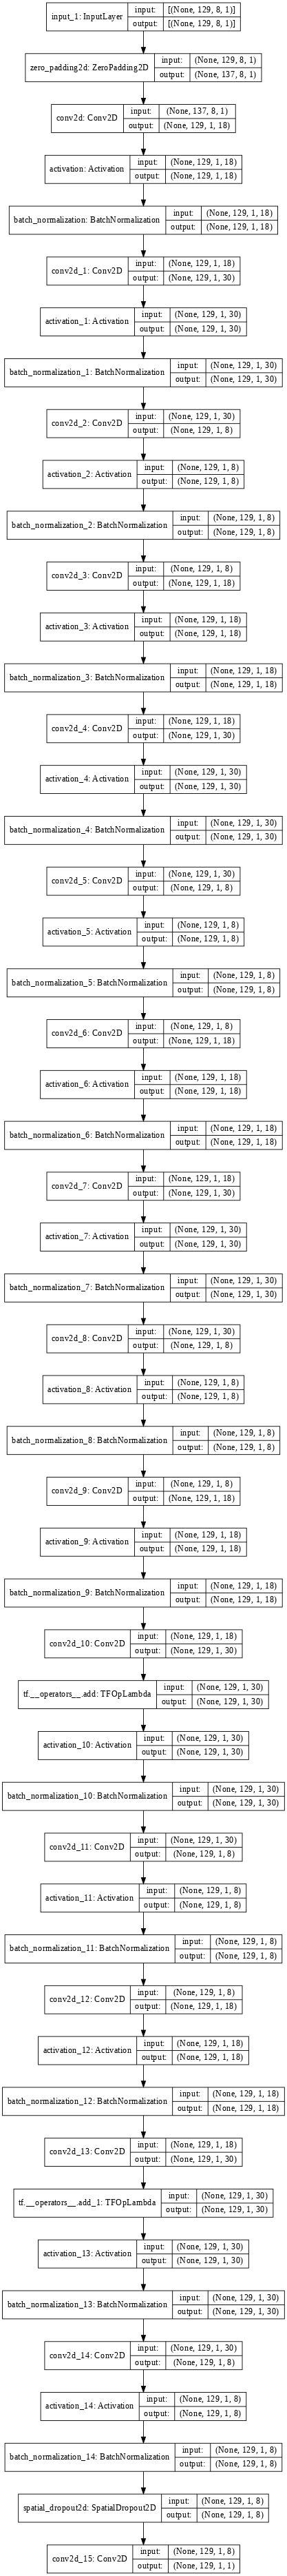

In [73]:
model=tf.keras.models.load_model('F:\\ahmed\\Desktop\\noise reduction\\CNN\\Models\\best91record.h5')

In [107]:
import datetime
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, baseline=None)
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath='F:\\ahmed\\Desktop\\noise reduction\\CNN\\Models\\2\\Model.h5', 
                                                         monitor='val_loss', save_best_only=True)

model.fit(train_dataset,
         steps_per_epoch=80000, # you might need to change this
         validation_data=test_dataset,
         epochs=5,
         callbacks=[early_stopping_callback,checkpoint_callback] )

Epoch 1/5
80000/80000 [==============================] - 9568s 120ms/step - loss: 0.1493 - rmse: 0.3864 - val_loss: 0.1388 - val_rmse: 0.3725
Epoch 2/5
80000/80000 [==============================] - 9444s 118ms/step - loss: 0.1372 - rmse: 0.3705 - val_loss: 0.1529 - val_rmse: 0.3910
Epoch 3/5
80000/80000 [==============================] - 9104s 114ms/step - loss: 0.1349 - rmse: 0.3673 - val_loss: 0.1820 - val_rmse: 0.4266
Epoch 4/5
80000/80000 [==============================] - 9074s 113ms/step - loss: 0.1334 - rmse: 0.3652 - val_loss: 0.1466 - val_rmse: 0.3829


In [10]:
model.save("F:\\ahmed\\Desktop\\noise reduction\\CNN\\weights.04-0.13.h5")

# Testing

In [11]:

windowLength = 256  #Window size is the amount of sample we apply windowing to
overlap      = round(0.25 * windowLength) # tell us how much we are shiffting to the right  during stft
ffTLength    = windowLength # the number of sample we consider it in each chunk of the signal when we segment the signal and when we pass it to stft( used for calculation )
fs           = 8000
numFeatures  = ffTLength//2 + 1
numSegments  = 8
window = scipy.signal.hamming(windowLength, sym=False)

In [12]:
def play(audio, sample_rate):
    ipd.display(ipd.Audio(data=audio, rate=sample_rate))  # load a local WAV file

In [13]:
def read_audio(filepath, sample_rate, normalize=True):
    audio, sr = librosa.load(filepath, sr=sample_rate)
    if normalize is True:
        div_fac = 1 / np.max(np.abs(audio)) / 3.0
        audio = audio * div_fac
        # audio = librosa.util.normalize(audio)
    return audio, sr

In [14]:

class FeatureExtractor:
    def __init__(self, audio, *, windowLength, overlap, sample_rate):
        self.audio = audio
        self.ffT_length = windowLength
        self.window_length = windowLength
        self.overlap = overlap
        self.sample_rate = sample_rate
        self.window = scipy.signal.hamming(self.window_length, sym=False)

    def get_stft_spectrogram(self):
        return librosa.stft(self.audio, n_fft=self.ffT_length, win_length=self.window_length, hop_length=self.overlap,
                            window=self.window, center=True)

    def get_audio_from_stft_spectrogram(self, stft_features):
        return librosa.istft(stft_features, win_length=self.window_length, hop_length=self.overlap,
                             window=self.window, center=True)

In [15]:
def l2_norm(vector):
    return np.square(vector)

def SDR(denoised, cleaned, eps=1e-7): # Signal to Distortion Ratio
    a = l2_norm(denoised)
    b = l2_norm(denoised - cleaned)
    a_b = a / b
    return np.mean(10 * np.log10(a_b + eps))

In [83]:
model=tf.keras.models.load_model('F:\\ahmed\\Desktop\\noise reduction\\CNN\\Models\\2\\Model 1st_epoch.h5')

In [73]:
model=tf.keras.models.load_model('F:\\ahmed\\Desktop\\noise reduction\\CNN\\best.h5')

In [148]:
noisyAudio,_=read_audio("F:\\ahmed\\Desktop\\noise reduction\\Noise Reduction dataset\\Wavenet Data\\noisy_trainset_wav\\p226_030.wav",sample_rate=fs)

In [93]:
noisyAudio,_=read_audio("F:\\ahmed\\Desktop\\noise reduction\\Noise Reduction dataset\\Wavenet Data\\noisy_trainset_wav\\p226_026.wav",sample_rate=fs)

In [123]:
noisyAudio,_=read_audio("F:\\ahmed\\Desktop\\noise reduction\\Noise Reduction dataset\\Wavenet Data\\noisy_trainset_wav\\p226_032.wav",sample_rate=fs)

In [111]:
noisyAudio,_=read_audio("F:\\ahmed\\Desktop\\noise reduction\\Noise Reduction dataset\\Wavenet Data\\noisy_trainset_wav\\p226_048.wav",sample_rate=fs)

In [13]:
noisyAudio,_=read_audio("F:\\ahmed\\Desktop\\noise reduction\\Noise Reduction dataset\\Wavenet Data\\noisy_trainset_wav\\p226_072.wav", sample_rate=fs)

In [74]:
#noisyAudio=denoisedAudioFullyConvolutional

In [136]:
noiseAudioFeatureExtractor = FeatureExtractor(noisyAudio, windowLength=windowLength, overlap=overlap, sample_rate=fs)
noise_stft_features = noiseAudioFeatureExtractor.get_stft_spectrogram()
noisyPhase = np.angle(noise_stft_features)
print(noisyPhase.shape)
noise_stft_features = np.abs(noise_stft_features)
mean = np.mean(noise_stft_features)
std = np.std(noise_stft_features)
noise_stft_features = (noise_stft_features - mean) / std

(129, 356)


In [137]:
def prepare_input_features(stft_features):
    # Phase Aware Scaling: To avoid extreme differences (more than
    # 45 degree) between the noisy and clean phase, the clean spectral magnitude was encoded as similar to [21]:
    noisySTFT = np.concatenate([stft_features[:,0:numSegments-1], stft_features], axis=1)
    stftSegments = np.zeros((numFeatures, numSegments , noisySTFT.shape[1] - numSegments + 1))

    for index in range(noisySTFT.shape[1] - numSegments + 1):
        stftSegments[:,:,index] = noisySTFT[:,index:index + numSegments]
    return stftSegments

In [138]:
predictors = prepare_input_features(noise_stft_features)

In [139]:
predictors = np.reshape(predictors, (predictors.shape[0], predictors.shape[1], 1, predictors.shape[2]))
predictors = np.transpose(predictors, (3, 0, 1, 2)).astype(np.float32)
print('predictors.shape:', predictors.shape)

predictors.shape: (356, 129, 8, 1)


In [140]:
STFTFullyConvolutional = model.predict(predictors)
print(STFTFullyConvolutional.shape)

(356, 129, 1, 1)


In [141]:
def revert_features_to_audio(features, phase, cleanMean=None, cleanStd=None):
    # scale the outpus back to the original range
    if cleanMean and cleanStd:
        features = cleanStd * features + cleanMean

    phase = np.transpose(phase, (1, 0))
    features = np.squeeze(features)

    # features = librosa.db_to_power(features)
    features = features * np.exp(1j * phase)  # that fixes the abs() ope previously done

    features = np.transpose(features, (1, 0))
    return noiseAudioFeatureExtractor.get_audio_from_stft_spectrogram(features)

In [142]:
play(noisyAudio,8000)

In [166]:
import requests
import scipy.io.wavfile
import numpy as np

# Specify the audio file
file_name = 'F:\\ahmed\\Desktop\\noise reduction\\Noise Reduction dataset\\Wavenet Data\\noisy_trainset_wav\\p226_050.wav'
files = {'file': open(file_name, 'rb')}

# The parameter denoise_level is optional. If not set, the default value is 20.
denoise_level = 20
querystring = {"denoise_control": denoise_level}

# Only include 'x-rapidapi-key' in the header. 
headers = {
    'x-rapidapi-key': "a4da1deaedmshd960f64cbf4e88fp166cf1jsn6803bb720f9a"
}

# RapidAPI url
url = "https://noise-reduction-service.p.rapidapi.com/denoise"

# Make API call
response = requests.request("POST", url, files=files, headers=headers, params=querystring)
print(response.content)
# Convert byte data from response to audio format
content = np.frombuffer(response.content, dtype=np.int)

# Save audio to the file with the original sample rate
sample_rate = 44100
ipd.Audio(data=content, rate=sample_rate)
#scipy.io.wavfile.write('denoised_speech.wav', sample_rate, content)

{"message":"You are not subscribed to this API."}


In [143]:
denoisedAudioFullyConvolutional = revert_features_to_audio(STFTFullyConvolutional, noisyPhase, mean, std)
ipd.Audio(data=denoisedAudioFullyConvolutional, rate=fs) # load a local WAV file

In [147]:
b,a = signal.butter(2, 1000/(fs/2), btype='highpass') # ButterWorth filter 4350
filteredSignal = signal.lfilter(b,a,denoisedAudioFullyConvolutional)
ipd.Audio(data=filteredSignal, rate=fs) # load a local WAV file

In [122]:
SDR(denoisedAudioFullyConvolutional,noisyAudio)

ValueError: operands could not be broadcast together with shapes (29056,) (29062,) 

In [116]:
denoisedAudioFullyConvolutional = revert_features_to_audio(STFTFullyConvolutional, noisyPhase, mean, std)
ipd.Audio(data=denoisedAudioFullyConvolutional, rate=fs) # load a local WAV file

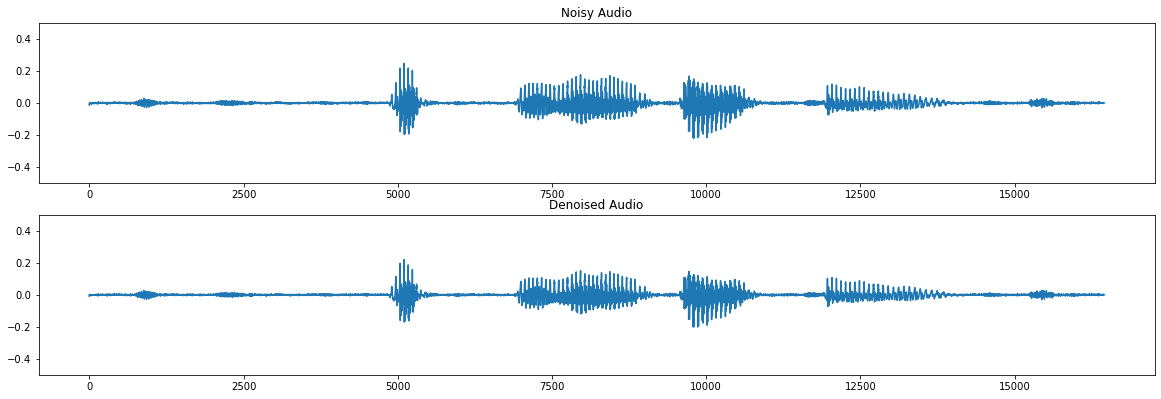

In [54]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(3, 1, 1)
plt.ylim(-0.5, 0.5)
ax2 = fig.add_subplot(3, 1, 2, sharex=ax1)
plt.ylim(-0.5, 0.5)

ax1.plot(noisyAudio)
ax1.set_title("Noisy Audio")

ax2.plot(denoisedAudioFullyConvolutional)
ax2.set_title("Denoised Audio")

plt.show()